# SI figure for effect of batch correction

Requires running the Integrated Approach Clustering and Fitting notebooks for CD8 and CD4 first.

In [4]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import json
import numpy as np
import pandas as pd
import scipy.stats as sts

import dynscsvi.plots as plots

tex_fonts = {
    "font.family" : "Helvetica",
    'pdf.fonttype' : 42,
}

plt.rcParams.update(tex_fonts)

spline_color = 'k'
spline_lw = 0.7
spline_dash = (0, (10, 10))
default_spline_kwargs = {
    "linewidth" : spline_lw, "color" : spline_color, "zorder" : 1
}

labx, laby = -0.1, 1.07

## Import data from batch correction analyses

In [5]:
with open("../results/data_figure_batch_correction_CD8.pkl", 'rb') as f:
    data_figure_batch_correction_CD8 = pickle.load(f)

with open("../results/data_figure_batch_correction_CD4.pkl", 'rb') as f:
    data_figure_batch_correction_CD4 = pickle.load(f)

## Create the figure

Simple histograms, re-use histogram bins to get nicer plots.

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


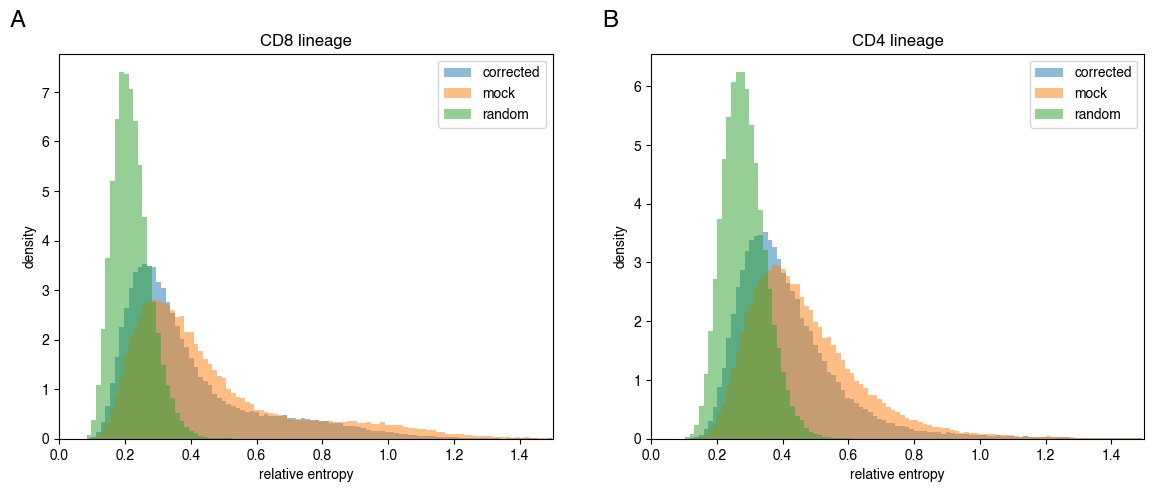

In [6]:
fig, (ax, bx) = plt.subplots(1, 2, figsize=(14,5))

def plot_entropy_dist(ax, hs, hs_mock, hs_rand, max_x=np.inf):
    bins = ax.hist(hs[hs < max_x], 100, alpha=0.5, density=True, label="corrected")
    ax.hist(hs_mock[hs_mock < max_x], bins[1], alpha=0.5, density=True, label="mock")
    ax.hist(hs_rand[hs_rand < max_x], bins[1], alpha=0.5, density=True, label="random")
    ax.legend()
    ax.set_xlabel("relative entropy")
    ax.set_ylabel("density")


hs = data_figure_batch_correction_CD8["hs"]
hs_mock = data_figure_batch_correction_CD8["hs_mock"]
hs_rand = data_figure_batch_correction_CD8["hs_rand"]
plot_entropy_dist(ax, hs, hs_mock, hs_rand, max_x=1.5)

ax.text(labx, laby, 'A', fontsize='xx-large', transform=ax.transAxes)
ax.set_title("CD8 lineage")
ax.set_xlim(0, 1.5)

hs = data_figure_batch_correction_CD4["hs"]
hs_mock = data_figure_batch_correction_CD4["hs_mock"]
hs_rand = data_figure_batch_correction_CD4["hs_rand"]
plot_entropy_dist(bx, hs, hs_mock, hs_rand, max_x=1.5)

bx.text(labx, laby, 'B', fontsize='xx-large', transform=bx.transAxes)
bx.set_title("CD4 lineage")
bx.set_xlim(0, 1.5)

#fig.savefig("../results/FigureBatchCorrect.pdf", bbox_inches='tight')